In [65]:
import glob
import os
import json


classes = []
val_jsonl_path = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/voc2007_val_polygon.jsonl"
train_jsonl_path = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/voc2007_train_polygon.jsonl"
output_dir = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/labels/"

# create the labels folder (output directory)
os.makedirs(output_dir, exist_ok=True)

with open(val_jsonl_path, "r") as json_file:
    json_list = list(json_file)

sample_json_str = json_list[0]
result = json.loads(sample_json_str)
# print(result)

curr_labels = result["label"]

polygons = []
for curr_label in curr_labels:
    curr_class = curr_label["label"]
    curr_polygons = curr_label["polygon"]
    print(f"[Rupal] {curr_class} {len(curr_polygon)}")
    curr_polygon = []
    for poly in curr_polygons:
        print("\t", type(poly), len(poly))
        curr_polygon.extend(poly)
    polygons.append(curr_polygon)
sample_polygon = polygons[0] #result["label"][1]["polygon"][-1]

[Rupal] person 534
	 <class 'list'> 162
	 <class 'list'> 10
	 <class 'list'> 144
	 <class 'list'> 10
	 <class 'list'> 10
[Rupal] sofa 336
	 <class 'list'> 86
	 <class 'list'> 10
	 <class 'list'> 10
	 <class 'list'> 106
	 <class 'list'> 10
	 <class 'list'> 10
	 <class 'list'> 90
	 <class 'list'> 92
	 <class 'list'> 120


In [66]:
from random import sample

len(sample_polygon)
sample_polygon_x = sample_polygon[0::2]
sample_polygon_y = sample_polygon[1::2]
print(len(sample_polygon), len(sample_polygon_x), len(sample_polygon_y))

sample_polygon_arr = np.array([sample_polygon_x, sample_polygon_y])
sample_polygon_arr = sample_polygon_arr.T
print(sample_polygon_arr.shape)

336 168 168
(168, 2)


/tmp/ipykernel_15055/1516384876.py:25: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  poly = patches.Polygon(polygon_np, True, facecolor=color, alpha=0.4)


<Figure size 1296x864 with 0 Axes>

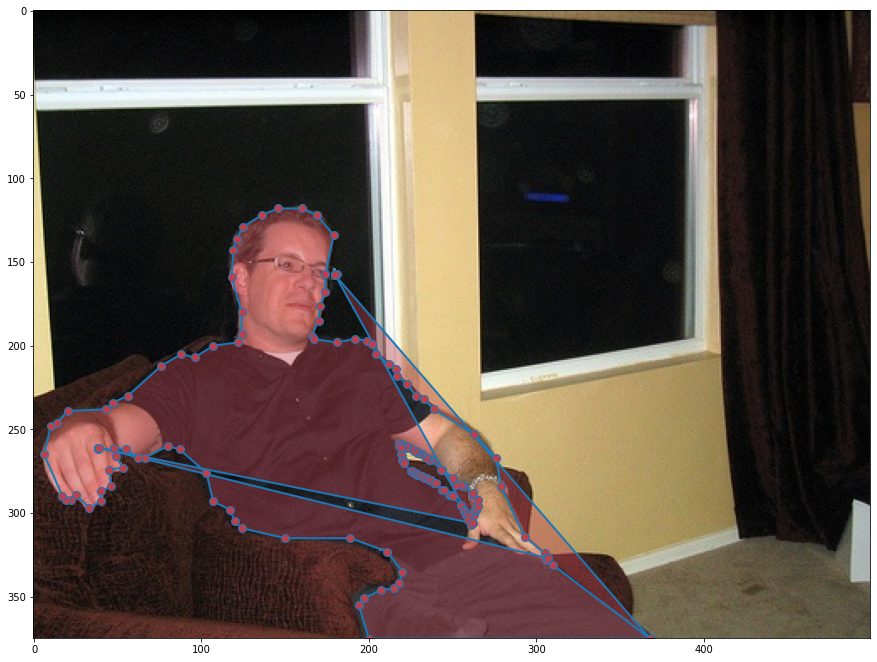

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image
import numpy as np
import json

sample_image = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/JPEGImages/003530.jpg"
IMAGE_SIZE = (18, 12)
plt.figure(figsize=IMAGE_SIZE)
img_np = mpimg.imread(sample_image)
img = Image.fromarray(img_np.astype("uint8"), "RGB")
x, y = img.size

fig, ax = plt.subplots(1, figsize=(15, 15))
color = np.random.rand(3)  #'red'
# Display the image
ax.imshow(img_np)
polygon_np = np.array(sample_polygon_arr)
polygon_np = polygon_np.reshape(-1, 2)
polygon_np[:, 0] *= x
polygon_np[:, 1] *= y
poly = patches.Polygon(polygon_np, True, facecolor=color, alpha=0.4)
ax.add_patch(poly)
poly_line = Line2D(
    polygon_np[:, 0],
    polygon_np[:, 1],
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor=color,
)
ax.add_line(poly_line)

In [70]:
def binarise_mask(mask_fname):

    mask = Image.open(mask_fname)
    mask = np.array(mask)
    # instances are encoded as different colors
    obj_ids = np.unique(mask)
    # first id is the background, so remove it
    obj_ids = obj_ids[1:]

    # split the color-encoded mask into a set of binary masks
    binary_masks = mask == obj_ids[:, None, None]
    return binary_masks

sample_image = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/SegmentationClass/003530.png"
masks = binarise_mask(sample_image)

In [72]:
masks.shape

(3, 375, 500)